# Лабораторная работа 4
# Правильный многоугольник Рело. Векторизация вычислений в numpy

Шпак Андрей Валерьевич, 26.07.2022

# Определения и свойства

$\textbf{Треугольник Рело}$ представляет собой область пересечения трех кругов радуса $r$ с центрами в вершинах равностороннего треугольника с длиной $r$.

$\textbf{Правильный}$ $n$ $\textbf{-угольник Рело}$ представляет собой область пересечения $n$ кругов радуса $r$ с центрами в вершинах правильного $n$-угольника с $\textit{нечетным числом}$ сторон длины $l$. Радиус круга $r$ согласован с длиной стороны $l$ правильного многоугольника таким образом, чтобы окружность радиуса $r$ проходила через две соседние вершины правильного n-угольника.

Правильный многоугольник Рело и круг являются примерами $\textbf{фигур постоянной ширины}$. Для фигуры постоянной ширины можно построить пары параллельных опорных прямых, которые касаются фигуры, но не пересекают ее, и, независимо от выбора пары опорных прямых, расстояние между прямыми будет всегда одинаковым.

Расстояние между опорными прямыми называется $\textbf{шириной фигуры}$. Ширина правильного многоугольника Рело равна радиусу $r$ пересекающихся кругов. Ширина круга равна диаметру круга. Среди всех фигур постоянной ширины треугольник Рело имеет наименьшую площадь, круг имеет наибольшую площадь.

# Задание 4.1 (Правильный многоугольник Рело)

$\color{red}{Напишите}$ пользовательскую функцию $\textbf{regular_polygon_Relo(n, center, r, N)}$, которая возвращает матрицу, каждая строка которой содержит координаты точек, описывающих границу правильного многоугольника Рело.

Аргументы пользовательской функции имеют следующий смысл:

- $\textbf{n}$: количество вершин правильного многоугольника Рело; является нечетным целым числом большим $2$; стандартное значение $n = 3$
- $\textbf{center}$: массив координат центра правильного многоугольника Рело; стандартнное значение $center = np.array([0, 0])$;
- $\textbf{r}$: ширина правильного многоугольника Рело; является положительным числом; стандартное значение $r = 1$;
- $\textbf{N}$: количество точек для описания одной стороны правильного многоугольника Рело; является натуральным числом; стандартное значение $N = 100$.

# Реализация задания 4.1

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Этап 1. Построение треугольника Рело

### 1. Определение переменных

In [3]:
n = 3 # количество вершин треугольника Рело
center = np.array([0, 0]) # координаты центра треугольника Рело
r = 10. # ширина треугольника Рело
N = 100 # количество точек для описания стороны треугольника Рело

### 2. Вычисление координат вершин правильного треугольника

Вершины правильного многоугольника расположены на окружности, описанной вокруг многоугольника. Радиус $R$ окружности, описанной вокруг правильного $n$-угольника с длиной стороны $l$, вычисляется по формуле
$$R = \dfrac{l}{2 \sin \pi / n}$$
Длина стороны $l$ правильного треугольника, на котором будем строить треугольник Рело, совпадает с шириной треугольника Рело $r$

In [4]:
l = r # равенство справедливо только для треугольника Рело

Вычислим радиус $R$ описанной окружности

In [11]:
R = l / (2 * math.sin(math.pi / n))

Введем прямоугольную декартову систему координат. Построим матрицу с координатами вершин правильного треугольника. Центр треуголника размещаем в точке $center$, радиус описанной окружности полагаем равным $R$

In [33]:
t = np.arange(0, 2 * np.pi, 2 * np.pi / n)
# ВОПРОС: в чем смысл разбиения промежутка [0, 2 * pi)?
# ОТВЕТ: смысл разбиения промежутка [0, 2 * pi) в том, что около этого самого треугольника описана окружность
# и я ищу точки этого треугольника на окружности
# треугольник правильный, поэтому разбиваю тригонометрический круг на равные части
print(t)
# эквиваленты такому разбиению - это
# [0, 2 * pi / 3, 4 * pi / 3]
# сам искал!

# обращаю внимание на векторизацию вычислений с массивами без использования циклов

# ВОПРОС: в чем смысл нахождения cos(t) и sin(t)?
# ОТВЕТ: смысл нахождения cos(t) и sin(t) в том, что так я узнаю координаты точек - вершин треугольника
# перед этим я нашел радианные меры углов
# можно на листике отметить эти углы на тригонометрической окружности как точки
# теперь нетрудно вывести координаты этих точек с помощью sin и cos, опустив перпендикуляры и радиус r = c:
# (c * cos(beta); c * sin(beta))
# beta - острый угол между радиусом и осью, нетружно доказать, что cos(острого угла beta) = cos(тупого угла)
print(np.cos(t))
print(np.sin(t))

# ВОПРОС: в чем математический смысл следующей строчки?
# ОТВЕТ:математический смысл следующей строчки в том, что
# я транспонирую матрицу, состоящую из двух строк:
# косинусы точек (углов) и синусы точек (углов)
# таким образом получаю координаты каждой точки, но не совсем
# чтобы получить именно координаты, умножаю на радиус описанной окружности
# и просто прибавляю координаты центра, то есть сдвигаю в нужное место, вот и все

vertices = center + R * np.transpose([np.cos(t), np.sin(t)])
vertices

[0.        2.0943951 4.1887902]
[ 1.  -0.5 -0.5]
[ 0.         0.8660254 -0.8660254]


array([[ 5.77350269,  0.        ],
       [-2.88675135,  5.        ],
       [-2.88675135, -5.        ]])

(-3.3197640478403514, 6.206515393788478, -5.499999999999999, 5.500000000000001)

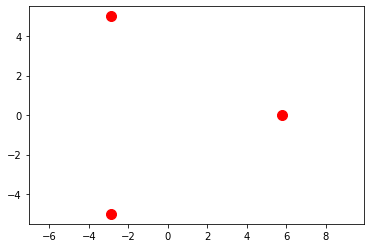

In [19]:
plt.plot(vertices[:,0], vertices[:,1], 'r.', markersize = 20)
plt.axis('equal')
# changes limits of x or y axis so that equal increments of x and y have the same length; a circle is circular

### 3. Представление одной стороны треугольника Рело

Обозначим через $\alpha$ центральный угол, соответствующий стороне правильного $n$-угольника. Тогда
$$\alpha = 2 \pi / n.$$
Обозначим через $\beta$ центральный угол, соответствующий стороне правильного многоугольника Рело, когда центр окружности расположен в вершине правильного многоугольника. Тогда
$$\beta = \alpha / 2.$$
Построим матрицу с координатами точек, описывающих сторону треугольника Рело относительно вершины vertices[0]. Сторона представляет собой дугу окружности радиуса $r$ с центром в точке vertices[0] и значением угла $\left[ \pi - \beta / 2, \pi + \beta / 2 \right]$.

Вычислим значения введенных величин

In [20]:
# почему такое значение угла?
alpha = 2 * math.pi / n
beta = alpha / 2

Введем вспомогательную последовательность значений угла для построения координат точек стороны треугольника Рело

In [25]:
angle = np.linspace(-beta / 2, beta / 2, N)
# возвращает равномерно распределенные числа в течение заданного интервала
# почему не arange?
# почему именно от -beta / 2 и до beta / 2?

Строим матрицу с координатами точек первой стороны

In [26]:
# обращаю внимание на векторизацию вычислений с массивами без использования циклов
side0 = vertices[0] + r * np.transpose([np.cos(angle + np.pi), np.sin(angle + np.pi)])

(-4.726350454318064, 6.273495698858845, -5.499999999999999, 5.500000000000001)

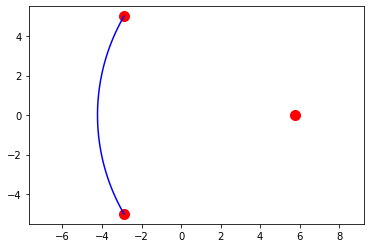

In [27]:
plt.plot(vertices[:,0], vertices[:,1], 'r.', markersize=20)
plt.plot(side0[:,0], side0[:,1], 'b-', markersize=20)
plt.axis('equal')